In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go 
plt.style.use('ggplot')



In [2]:
stocks_df = pd.read_csv('stocks.csv')
stocks_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [3]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [4]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'],format='%Y-%m-%d')

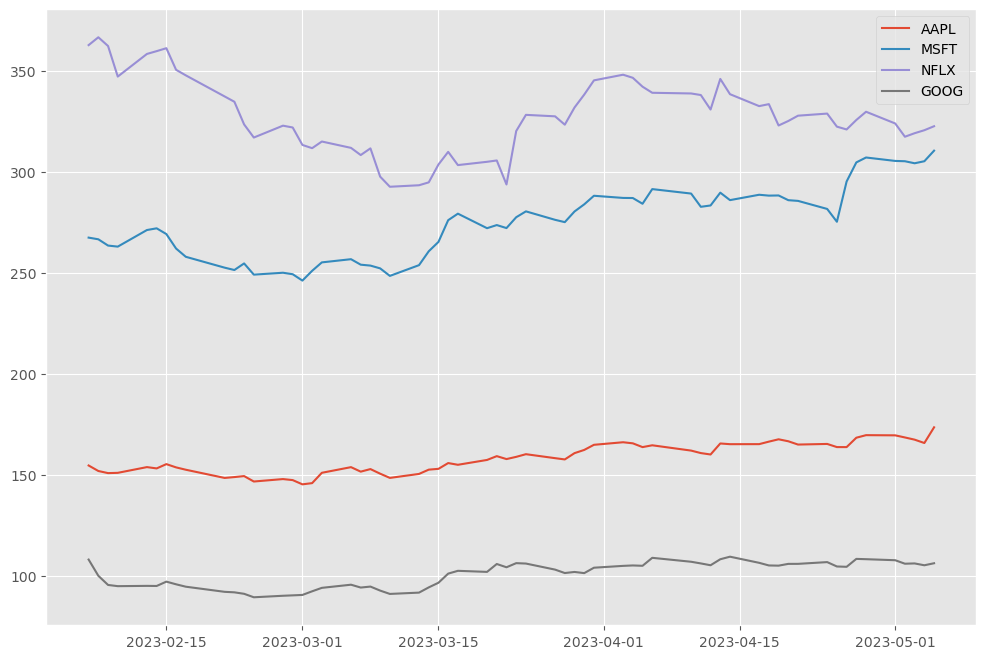

In [6]:
plt.figure(figsize=(12,8))
for ticket in stocks_df['Ticker'].unique():
    subset = stocks_df[stocks_df['Ticker'] == ticket]
    plt.plot(subset['Date'],subset['Close'])


plt.legend(stocks_df['Ticker'].unique())    
plt.show()


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decomposition_plots(ticket:str):
    new_subset = stocks_df[stocks_df['Ticker']==ticket]
    result = seasonal_decompose(x=new_subset.Close,model='additive',period=5)
    plt.figure(figsize=(12,8))

    
    plt.subplot(3,1,1)
    plt.plot(new_subset.Close)
    
    plt.subplot(3,1,1)
    plt.plot(result.trend)
    plt.title(f'Trend And Actual Date {ticket}')
    
    plt.subplot(3,1,2)
    plt.plot(result.seasonal)
    plt.title(f'Seasonality {ticket}')
    
    plt.subplot(3,1,3)
    plt.plot(result.resid)
    plt.title(f'Residue {ticket}')
    
    plt.tight_layout()
    plt.show()

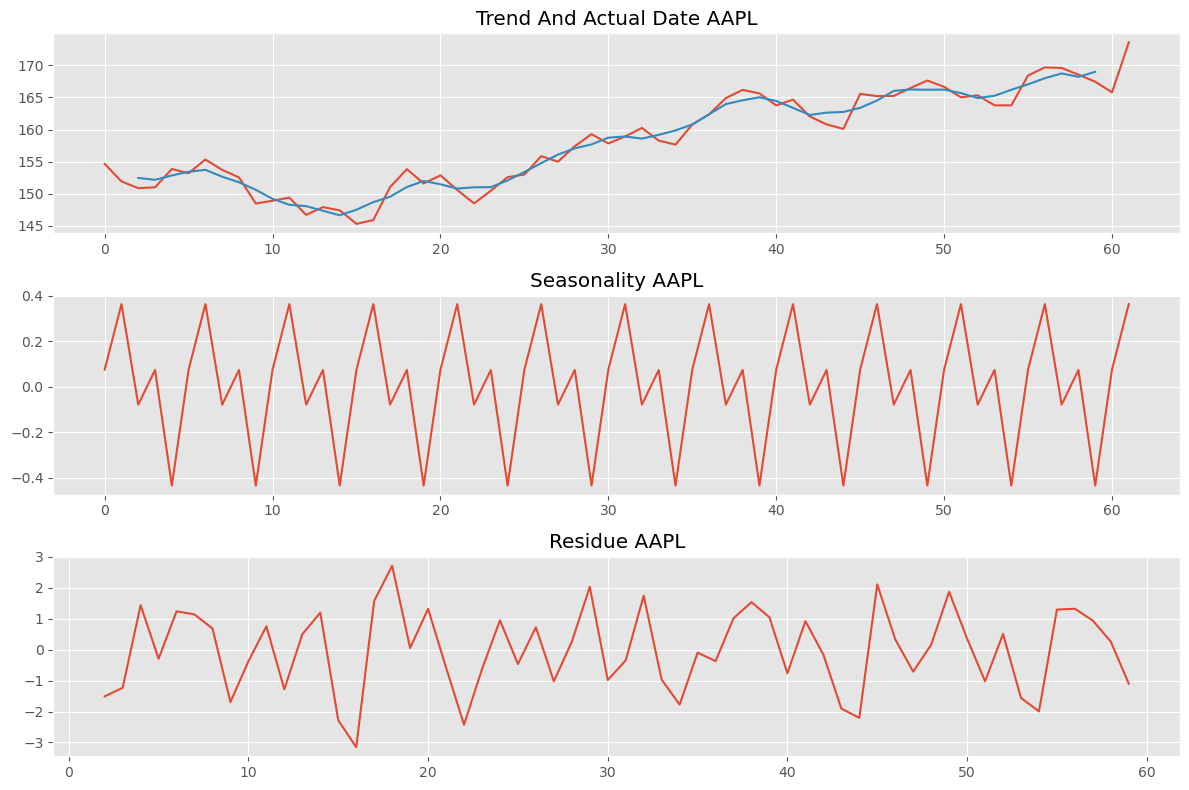

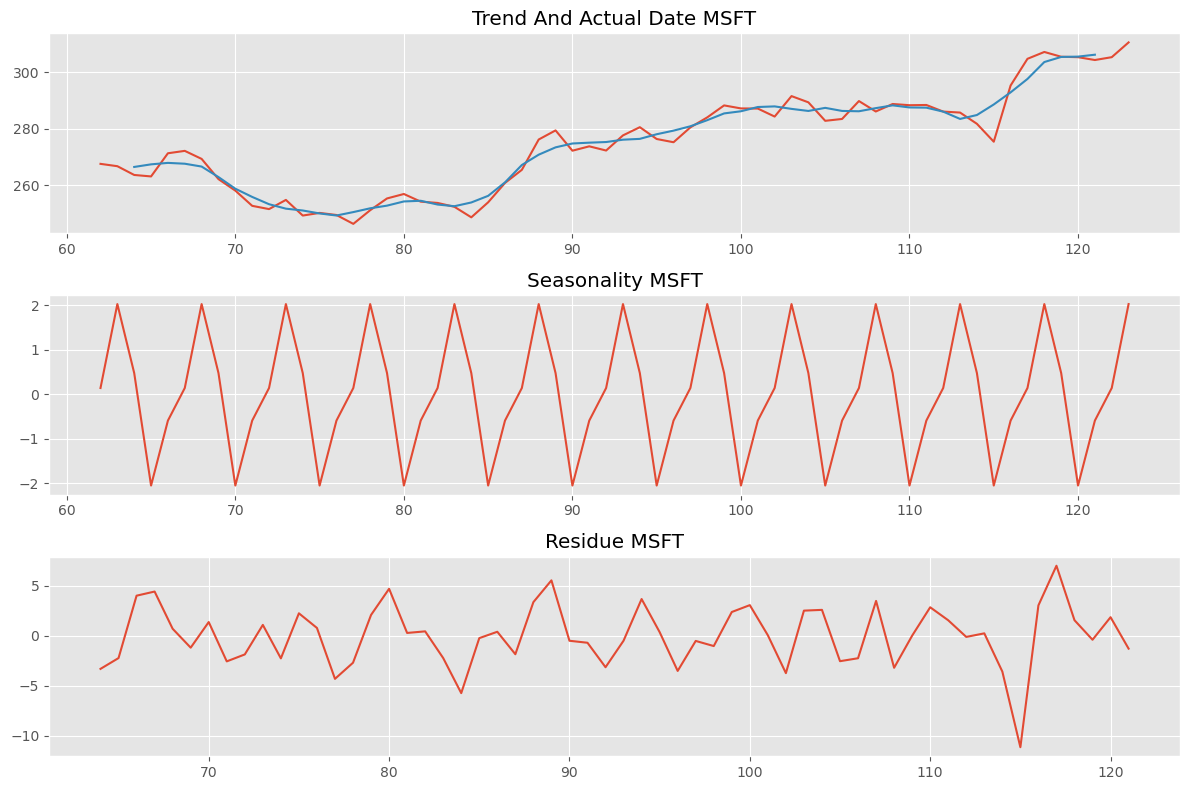

In [8]:
decomposition_plots(ticket='AAPL')
decomposition_plots(ticket='MSFT')

In [9]:
stocks_df.Ticker.unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

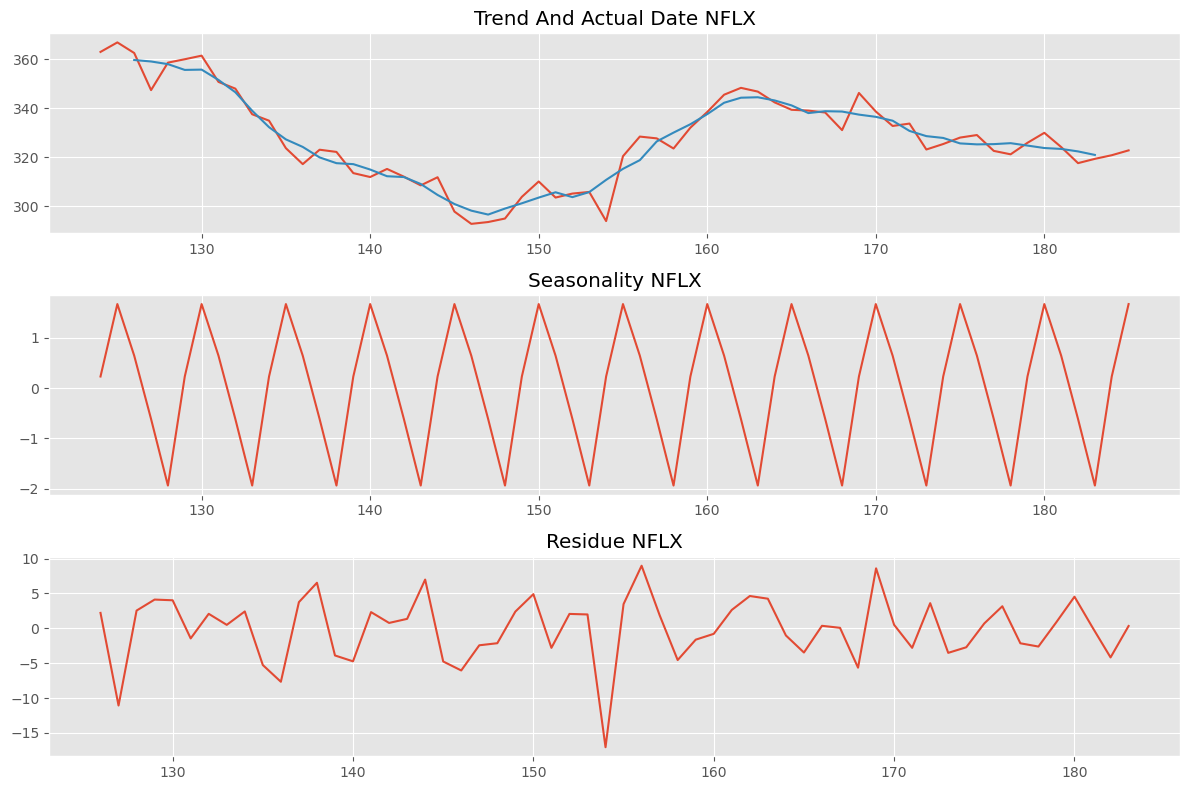

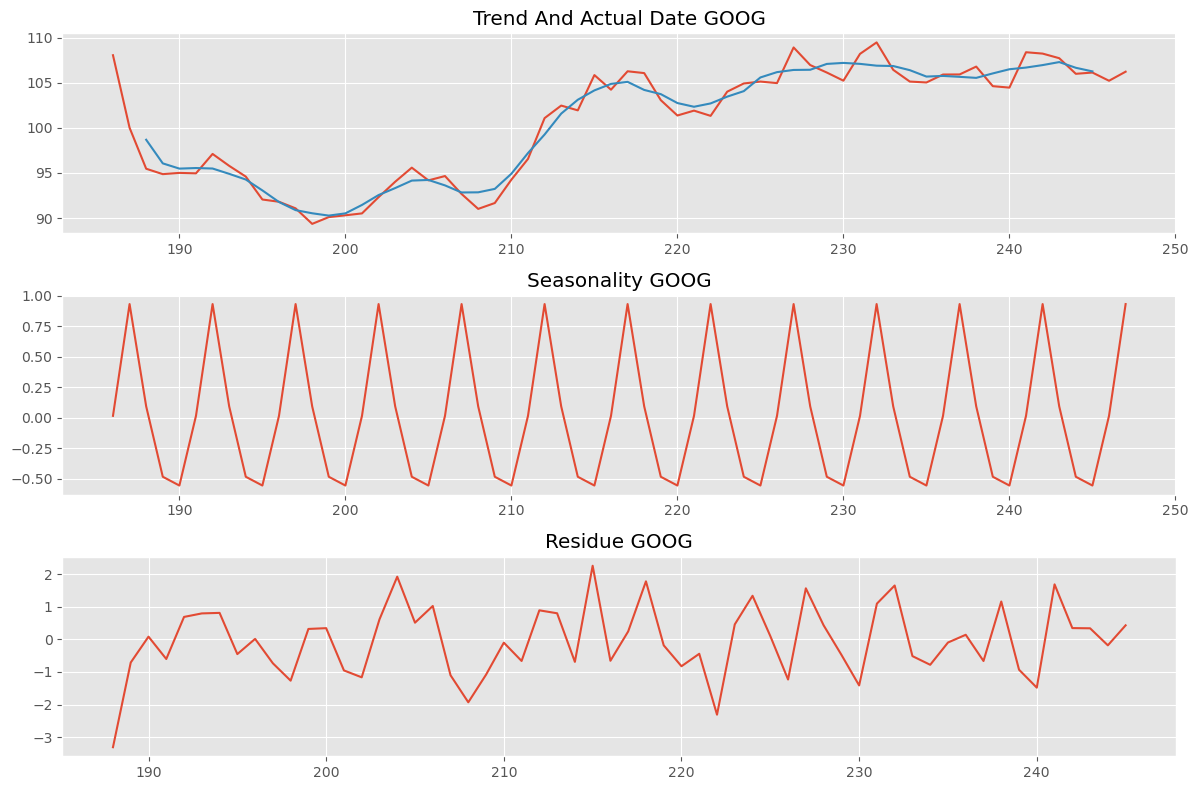

In [10]:
decomposition_plots(ticket='NFLX')
decomposition_plots(ticket='GOOG')


In [11]:
test = stocks_df[stocks_df['Ticker']=='MSFT']
series = test[['Close','Date']]
series.set_index('Date',inplace=True)


In [12]:
print(series['Close'])

Date
2023-02-07    267.559998
2023-02-08    266.730011
2023-02-09    263.619995
2023-02-10    263.100006
2023-02-13    271.320007
                 ...    
2023-05-01    305.559998
2023-05-02    305.410004
2023-05-03    304.399994
2023-05-04    305.410004
2023-05-05    310.649994
Name: Close, Length: 62, dtype: float64


/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  3.79106D+00    |proj g|=  8.99900D-01

At iterate    1    f=  3.33348D+00    |proj g|=  2.07965D-01

At iterate    2    f=  3.29710D+00    |proj g|=  9.85978D-02

At iterate    3    f=  3.28793D+00    |proj g|=  8.39255D-02

At iterate    4    f=  3.26866D+00    |proj g|=  1.19869D-01

At iterate    5    f=  3.24799D+00    |proj g|=  2.30563D-01

At iterate    6    f=  3.17880D+00    |proj g|=  2.85294D-02

At iterate    7    f=  3.17823D+00    |proj g|=  1.98395D-02

At iterate    8    f=  3.17661D+00    |proj g|=  8.37824D-02

At iterate    9    f=  3.17061D+00    |proj g|=  2.11099D-02

At iterate   10    f=  3.13637D+00    |proj g|=  1.79292D-01

At iterate   11    f=  3.13190D+00    |proj g|=  2.55050D-01

At iterate   12    f=  2.96429D+00    |proj g|=  2.46145D-01

At iterate   13    f=  2.9

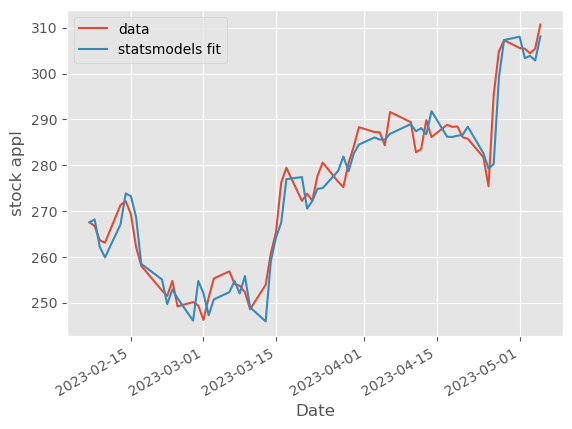

In [20]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
model = ETSModel(series['Close'], trend='add', seasonal='add', seasonal_periods=10,damped_trend=True)  # Adjust seasonal_periods as needed
fit = model.fit(maxiter=10000)
series['Close'].plot(label="data")
fit.fittedvalues.plot(label="statsmodels fit")
plt.ylabel("stock appl")

plt.legend()
plt.show()


In [21]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                  Close   No. Observations:                   62
Model:                      ETS(AAdA)   Log Likelihood                -173.886
Date:                Mon, 27 May 2024   AIC                            381.772
Time:                        16:38:49   BIC                            417.933
Sample:                             0   HQIC                           395.970
                                 - 62   Scale                           15.980
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9999      0.165      6.050      0.000       0.676       1.324
smoothing_trend        0.0460      0.071      0.643      0.520      -0.094       0.186
smoothing_seasonal  9.125e-05        nan        nan        nan         nan         nan
damping_trend          0.9040      0.128      7.068      0.000       0.653       1.155
initial_level        269.2555   3571.035      0.075      0.940   -6729.844    7268.355
initial_trend         -1.8697      3.020     -0.619      0.536      -7.789       4.050
initial_seasonal.0     2.0253   3571.137      0.001      1.000   -6997.274    7001.324
initial_seasonal.1     4.0748   3571.206      0.001      0.999   -6995.360    7003.509
initial_seasonal.2     6.7360   3571.171      0.002      0.998   -6992.630    7006.102
initial_seasonal.3     6.5658   3571.029      0.002      0.999   -6992.522    7005.654
initial_seasonal.4     4.7685   3571.257      0.001      0.999   -6994.766    7004.303
initial_seasonal.5     1.5327   3571.550      0.000      1.000   -6998.576    7001.642
initial_seasonal.6    -3.4737   3570.876     -0.001      0.999   -7002.262    6995.315
initial_seasonal.7    -0.9967   3570.651     -0.000      1.000   -6999.345    6997.351
initial_seasonal.8     2.1509   3571.108      0.001      1.000   -6997.093    7001.395
initial_seasonal.9          0   3571.119          0      1.000   -6999.264    6999.264
===================================================================================
Ljung-Box (Q):                       24.08   Jarque-Bera (JB):                 9.23
Prob(Q):                              0.02   Prob(JB):                         0.01
Heteroskedasticity (H):               1.62   Skew:                             0.54
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [22]:
fit.predict()

Date
2023-02-07    267.565335
2023-02-08    268.182767
2023-02-09    262.140816
2023-02-10    259.900966
2023-02-13    267.116468
                 ...    
2023-05-01    308.030467
2023-05-02    303.338328
2023-05-03    303.844059
2023-05-04    302.834689
2023-05-05    308.083720
Length: 62, dtype: float64

In [23]:
forecasted_values = fit.forecast(steps=10)
list(forecasted_values)

/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[308.08188444959075,
 306.12870851571904,
 311.6087164428994,
 315.27254907845696,
 317.4568408972746,
 317.97689128451066,
 315.6318893161127,
 313.86828498076585,
 312.1013750651285,
 314.48586829970424]

In [24]:
forecasted_df = pd.DataFrame(forecasted_values.values, index=pd.date_range(start=series.index[-1]+pd.Timedelta(days=1), periods=10, freq='D',name='Date'),columns=['Close'])


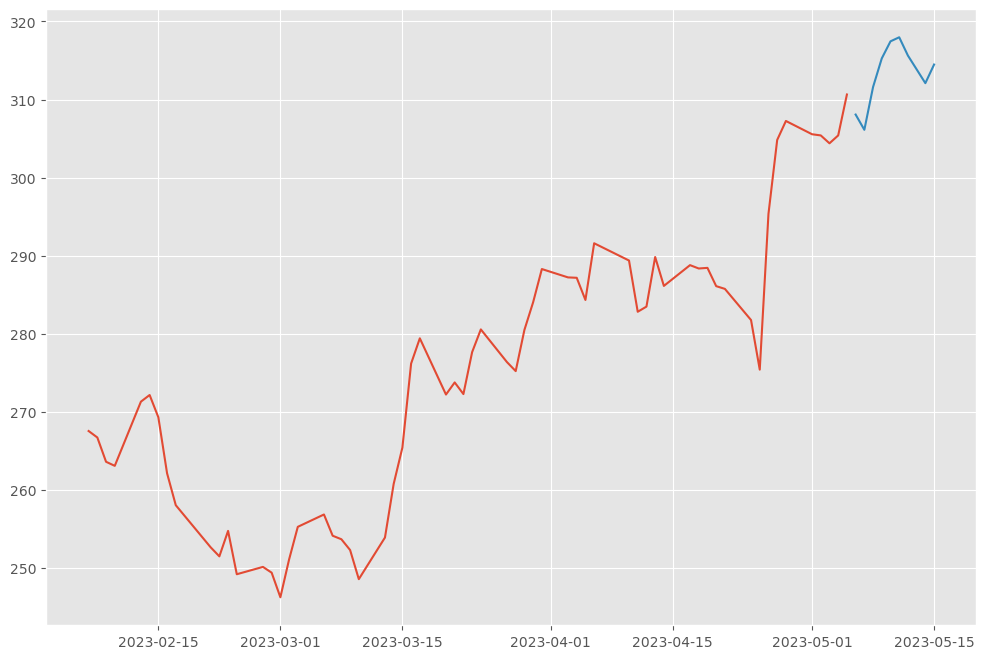

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(1,1,1)
plt.plot(series.Close)
plt.plot(forecasted_df.Close,)

In [195]:
forecasted_df

SyntaxError: invalid syntax (2883737568.py, line 1)

In [186]:
series

,Close
Date,
2023-02-07,154.649994
2023-02-08,151.919998
2023-02-09,150.869995
2023-02-10,151.009995
2023-02-13,153.850006
...,...
2023-05-01,169.589996
2023-05-02,168.539993
2023-05-03,167.449997


In [183]:
series.index[-1]

Timestamp('2023-05-05 00:00:00')

In [240]:
series = series.asfreq('D')  # Adjust 'D' to the appropriate frequency if needed
series.dropna()

,Close
Date,
2023-02-07,154.649994
2023-02-08,151.919998
2023-02-09,150.869995
2023-02-10,151.009995
2023-02-13,153.850006
...,...
2023-05-01,169.589996
2023-05-02,168.539993
2023-05-03,167.449997
